<a href="https://colab.research.google.com/github/danielreinaux/acidentes_e_radares/blob/main/AnaliseRadar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Análise dos Acidentes em Rodovias e Posicionamento de Radares**



## **1 - Entendimento do Problema de Negócio**

Ao investigarmos a relação entre a presença de radares nas estradas e seus efeitos sobre a segurança viária e o fluxo de tráfego, buscamos compreender se eles são verdadeiramente eficazes em prevenir acidentes e de que maneira podem ser aprimorados.

Utilizando dados disponibilizados pelo governo, nosso foco está em analisar os locais com maior incidência de acidentes e compará-los com os pontos onde os radares estão instalados. O objetivo é verificar se existe uma correspondência entre a localização dos radares e a necessidade real nas rodivias, e entender como esses dispositivos estão contribuindo para a segurança do trânsito.

Desejamos propor estratégias para tornas as etradas mais seguras e eficientes, beneficiando a todso que delas fazem uso. Através de uma análise criteriosa dos dados, pretendemos identificar medidas para aprimoar a gestão no trânsito nas rodovias do país.

Abaixo, apresento algumas questões de negócio relevantes para explorar em nossa análise.



1. *Avaliação da Performance dos Radares:*
Investigar o dezempenho dos radares em diferentes regiões e tipos de rodovias.

2. *Identificação de Pontos Críticos:* Identificar os locais onde ocorrem mais acidentes e avaliar se os radares estão presentes naquele ponto e etc. Isso pode ajudar a determinar se os radares estão posicionados nos lugares certos.

3. *Analisar a velocidade média*: Analisar a velocidade média dos veículos em diferentes trechos de rodovia com e sem radares. Isso pode ajudar a entender se os radares estão influenciando o comportamento dos motoristas.

4. *Correlação entre Radares e Acidentes*: Realizar uma análise estatística para identificar se há uma correlação significativa entre a presença de radares em determinadas áreas e a redução da frequência de acidentes.

5. *Avaliação do Impacto Econômico*: Além da segurança, considerar o impacto econômico dos acidentes, como custos médicos, perda de produtividade e danos materiais. Isso pode ajudar a justificar investimentos em radares.

## **2 - Entendimento dos Dados**

### **2.1 - Dados Acidentes Rodovias PRF**

#### **2.1.1 - Sobre os dados da PRF.**

Os dados de acidentes de trânsito utilizados neste estudo foram coletados da [base pública da Polícia Rodoviária Federal (PRF)](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) e abrangem o período de janeiro a julho de 2023. Essa base oficial e de acesso público contém registros abrangentes de acidentes ocorridos nas rodovias de todo o Brasil durante esse intervalo.

Essas informações representam um recurso fundamental para nossa análise, possibilitando uma compreensão aprofundada e embasada sobre a segurança nas estradas. A disponibilidade desses dados contribui significativamente para tomadas de decisões informadas e a implementação de medidas que visam aprimorar a segurança viária em todo o país.



#### **2.1.2 - Dicionário de Dados.**

* `id` - Número de identificação único para cada registro no conjunto de dados.

* `data_inversa` - Data do acidente no formato AAAAMMDD (exemplo: 2023-03-13).

* `dia_semana` - Dia da semana em que o acidente ocorreu (exemplo: segunda-feira).

* `horario` - Hora do acidente no formato HH:MM:SS (exemplo: 18:10:00).

* `uf` - Unidade Federativa onde o acidente ocorreu (exemplo: ES - Espírito Santo).

* `br` - Número da rodovia onde o acidente ocorreu (exemplo: 101.0).

* `km` - Quilômetro exato da rodovia onde o acidente ocorreu (exemplo: 293,6).

* `municipio` - Município onde o acidente ocorreu (exemplo: CARIACICA).

* `causa_acidente` - Causa principal do acidente (exemplo: Ausência de sinalização).

* `tipo_acidente` - Tipo de acidente (exemplo: Atropelamento de Pedestre).

* `classificacao_acidente` - Classificação do acidente (exemplo: Com Vítimas Feridas).

* `fase_dia` - Fase do dia em que o acidente ocorreu (exemplo: Anoitecer).

* `sentido_via` - Sentido da via no momento do acidente (exemplo: Crescente).

* `condicao_metereologica` - Condição meteorológica no momento do acidente (exemplo: Céu Claro).

* `tipo_pista` - Tipo de pista (exemplo: Múltipla).

* `tracado_via` - Traçado da via no momento do acidente (exemplo: Reta).

* `uso_solo` - Se a área onde o acidente ocorreu é utilizada para fins agrícolas ou não (exemplo: Sim).

* `pessoas` - Número total de pessoas envolvidas no acidente (exemplo: 2).

* `mortos` - Número de pessoas mortas no acidente (exemplo: 0).

* `feridos_leves` - Número de pessoas com ferimentos leves no acidente (exemplo: 0).

* `feridos_graves` - Número de pessoas com ferimentos graves no acidente (exemplo: 1).

* `ilesos` - Número de pessoas ilesas no acidente (exemplo: 1).

* `ignorados` - Número de pessoas cujo estado não foi informado no acidente (exemplo: 0).

* `feridos` - Número total de pessoas feridas no acidente (exemplo: 1).

* `veiculos` - Número total de veículos envolvidos no acidente (exemplo: 1).

* `latitude` - Coordenada de latitude do local do acidente (exemplo: -20.324159).

* `longitude` - Coordenada de longitude do local do acidente (exemplo: -40.395290).

* `regional` - Regional de tráfego onde o acidente ocorreu (exemplo: SPRF-ES).

* `delegacia` - Delegacia responsável pelo registro do acidente (exemplo: DEL01-ES).

* `uop` - Unidade Operacional da Polícia Rodoviária responsável pelo atendimento do acidente (exemplo: UOP01-DEL01-ES).

In [ ]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_acidentes = pd.read_csv('/content/Dados_PRF_2023 (1).csv.crdownload', sep=';', encoding = 'latin1')

df_acidentes.shape

(8808, 30)

In [ ]:
# Visualizar as 5 primeiras linhas
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [ ]:
# Visualizando as 5 últimas linhas
df_acidentes.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
8803,497318,2023-01-04,quarta-feira,12:10:00,SP,101.0,"46,3",UBATUBA,Acessar a via sem observar a presença dos outr...,Colisão transversal,...,0,1,0,1,2,"-23,42580309","-45,07721543",SPRF-SP,DEL06-SP,UOP01-DEL06-SP
8804,497320,2023-01-04,quarta-feira,20:40:00,SC,282.0,"603,2",MARAVILHA,Ingestão de álcool pelo condutor,Capotamento,...,0,2,0,0,1,"-26,800215","-53,190606",SPRF-SC,DEL07-SC,UOP02-DEL07-SC
8805,497324,2023-01-04,quarta-feira,20:40:00,RS,468.0,"102,3",TRES PASSOS,Transitar na contramão,Colisão frontal,...,1,0,0,2,2,"-27,46094671","-53,9400655",SPRF-RS,DEL08-RS,UOP02-DEL08-RS
8806,497326,2023-01-04,quarta-feira,21:40:00,PR,116.0,43,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Capotamento,...,0,2,0,1,1,"-25,18101149","-48,88196442",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
8807,497329,2023-01-04,quarta-feira,22:30:00,MG,381.0,501,BETIM,Ausência de reação do condutor,Atropelamento de Pedestre,...,0,1,1,0,3,"-20,03146447","-44,23",NaN,NaN,NaN


In [ ]:
# Criar variável para metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
generate_metadata(df_acidentes)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.00,8808
1,veiculos,int64,0,0.00,12
2,feridos,int64,0,0.00,17
3,ignorados,int64,0,0.00,8
4,ilesos,int64,0,0.00,29
5,feridos_graves,int64,0,0.00,9
6,feridos_leves,int64,0,0.00,16
7,mortos,int64,0,0.00,7
8,pessoas,int64,0,0.00,37
9,br,float64,10,0.11,100


-  A partir dos metadados gerados, um primeiro ponto a se verificar é a presença de valores nulos nas variáveis, `delegacia`, `km`, `uop`, `regional` e `br`. Apesar da presença dos nulos na tabela, será possível manter a consistência na análise dessas colunas visto que a coluna com maior presença de nulos é a `delegacia`, com apenas 0.93% dos valores nulos.`

- As variáveis `horário` e `data_inversa` estão como objeto. Precisarão ser ajustadas para o tipo datetime.

- As variáveis `longitude` e `latitude` se encontram como objeto. Será preciso ajustá-las para numéricas, para nossas análises.

In [ ]:
df_acidentes.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,8808.000000,8798.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000
mean,514200.432902,214.183564,2.645209,0.140668,0.782470,0.275431,1.277589,0.169051,1.057902,1.864555
std,11083.237883,127.037145,2.434711,0.425260,1.215005,0.594227,1.915920,0.485662,1.315397,0.841431
min,496506.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,504545.750000,116.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,513945.000000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,523961.750000,324.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,535849.000000,495.000000,65.000000,7.000000,61.000000,13.000000,48.000000,14.000000,62.000000,12.000000


* A quantidade de acidentes registrados é de 8808.

* O maior número de pessoas envolvidas em um acidente são 62 pessoas, e o número de feridos graves são 13

* Como já podemos observas, a quantidade de feridos_leves nos acidentes geralmente é maior do que feridos_graves.

* Quantidade de vítimas fatais tem uma média de 0.14.

* A média de veículos envolvidos em cada acidente são de 1.86, logo, na grande maioria das vezes os acidentes envolvem mais de um veículo. Tendo sua máxima com 12 veículos

In [ ]:
#Análise estatística nas variáveis categórias
df_acidentes.describe(include = 'object')

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,delegacia,uop
count,8808,8808,8808,8808,8798,8808,8808,8808,8808,8808,8808,8808,8808,8808,8808,8808,8808,8805,8751,8803
unique,181,7,853,27,3497,1385,67,16,3,4,3,8,3,10,2,7577,7573,27,146,389
top,2023-01-01,sexta-feira,17:00:00,MG,3,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,"-24,83558399","-48,2223738",SPRF-MG,DEL01-PR,UOP01-DEL01-PE
freq,196,1337,111,1402,31,76,1267,1839,6074,5164,4670,5362,5021,4380,6268,8,8,1399,350,97


* **Dia da semana** com mais acidentes é a sexta-feira, com 1337 registros

* **O dia que apresentou mais registros** de acidentes nas rodovias federais, foi o dia 01/01/2023 com 196 acidentes.

* **Causa de acidente mais comum:** A reação tardia ou neficiente do condutor foi o motivo de acidente mais comum

* **fase do dia**: A fase do dia com mais acidentes foi em pleno dia, e com o céu claro. Presente em mais de 60% dos casos.

* **Trecho da pista com mais acidentes**: Curioso observar que os traçados da via com mais acidentes foram o de reta.

### **2.2 - Dados Radares Rodovias Federais.**



#### **2.2.1 - Sobre os dados dos Radares nas Rodovias Federais.**

Os dados sobre os radares de trânsito nas rodovias federais do Brasil são acessíveis ao público por meio do portal "Dados.gov.br" do governo federal. Para acessar os dados dos radares de trânsito nas rodovias federais, você pode utilizar o seguinte link: [Acesso aos Dados de Radares](https://dados.gov.br/dados/conjuntos-dados/radar). Essas informações são fornecidas pela Agência Nacional de Transportes Terrestres (ANTT), uma entidade responsável por regulamentar e fiscalizar o transporte terrestre no país.

As concessionárias de rodovias coletam e inserem os dados sobre os radares, que são posteriormente disponibilizados na rede da ANTT. Isso permite o acesso público a informações importantes, como a localização e a operação dos radares, contribuindo para a segurança viária e a tomada de decisões embasadas em dados.

Essa iniciativa demonstra o compromisso do governo com a segurança nas rodovias federais e a importância de dados acessíveis para a melhoria da mobilidade e a prevenção de acidentes.

#### **2.2.2 - Dicionário de Dados.**

- `concessionaria`: Nome da Concessionária que prestou as informações.

- `ano_do_pnv_snv`: Ano que representa as informações no Plano Nacional de Viação e Sistema Nacional de Viação. Ex.: 2017

- `tipo_de_radar`: Tipo de radar (Redutor ou Controlador).

- `rodovia`: Rodovia responsável pela concessionária. Ex.: BR-116.

- `uf`: Sigla do Estado da rodovia. Ex.: SP.

- `km_m`: Representação do quilômetro mais a metragem. Ex.: 317,940.

- `Município`: Município da localização do radar.

- `tipo_de_pista`: Tipo da pista que está localizada a sinalização (principal ou marginal).

- `sentido`: Representação da ordem crescente ou decrescente ou crescente/decrescente.

- `situacao`: Situação atual (ativo ou inativo).

- `data_da_inativacao`: Data de registro, caso a situação seja dada como inativo.

- `latitude`: Representação de Coordenadas. Ex.: -22,490967.

- `longitude`: Representação de Coordenadas. Ex.: -44,561228

- `velocidade_leve`: Velocidade da Rodovia veículos leves

#### 2.3 - Visualização da Base de Dados.


In [ ]:
# Importar dados dos radares

df_radares = pd.read_csv('/content/recurso__7649663_json.csv', sep = ',', encoding = 'latin1')

In [ ]:
# Visualizando as 5 primeiras linhas
df_radares.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"483,700",Betim,Principal,Crescente,Ativo,NaN,"-19,959486","-44,085386",80
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"493,290",Betim,Principal,Crescente,Ativo,NaN,"-19,964349","-44,171924",80
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"525,350",Brumadinho,Principal,Crescente,Ativo,NaN,"-20,146664","-44,323897",80
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"528,350",Brumadinho,Principal,Decrescente,Ativo,NaN,"-20,167194","-44,334434",80
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"568,890",Itaguara,Principal,Decrescente,Ativo,NaN,"-20,410679","-44,526628",80


In [ ]:
#Visualizando as 5 últimas linhas
df_radares.tail()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve
603,VIA SUL,2019,Redutor,BR-386,RS,"388,000",Triunfo,Principal,Crescente,Ativo,NaN,"-29,695129","-51,693235",60
604,VIA SUL,2019,Controlador,BR-386,RS,"367,400",Fazenda Vilanova,Principal,Crescente,Ativo,NaN,"-29,581164","-51,841074",100
605,VIA SUL,2019,Controlador,BR-386,RS,"305,000",Pouso Novo,Principal,Crescente,Ativo,NaN,"-29,189548","-52,188429",60
606,VIA SUL,2019,Redutor,BR-386,RS,"270,800",Fontoura Xavier,Principal,Decrescente,Ativo,NaN,"-28,978289","-52,367937",60
607,VIA SUL,2019,Controlador,BR-386,RS,"245,200",Soledade,Principal,Decrescente,Ativo,NaN,"-28,803798","-52,507508",60


In [ ]:
# Criar variável para metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
generate_metadata(df_radares)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,data_da_inativacao,float64,608,100.0,0
3,concessionaria,object,0,0.0,20
4,tipo_de_radar,object,0,0.0,2
5,rodovia,object,0,0.0,20
6,uf,object,0,0.0,13
7,km_m,object,0,0.0,576
8,municipio,object,0,0.0,186
9,tipo_pista,object,0,0.0,2


* Importante já perceber que a coluna `data_da_inativacao` tem o percentual de 100% dos nulos, logo, vamos retirá-lo
* `latitude` e `longitude` estão no tipo 'object', logo, precisaremos mudar para tipo numérico para a criação dos mapas e a correta manipulação
* A coluna `ano_do_pnv_snv` está no tipo 'int', e precisará estar no tipo datetime.

In [ ]:
# Análise estatística das variáveis numéricas
df_radares.describe()

,ano_do_pnv_snv,data_da_inativacao,velocidade_leve
count,608.000000,0.0,608.000000
mean,2016.312500,NaN,70.904605
std,4.411425,NaN,20.831262
min,2003.000000,NaN,40.000000
25%,2016.000000,NaN,60.000000
50%,2017.000000,NaN,60.000000
75%,2020.000000,NaN,80.000000
max,2021.000000,NaN,110.000000


* Temos um registro com 608 radares presentes nas rodovias federais

* Os dados analisados contam com radares, que representam informações no Plano Nacional de Viação e Sistema Nacional de Viação, do ano de 2003 até 2021.

* Podemos ver que a `velocidade_leve` média nos radares é de 70.9km/h, tendo velocidades máximas de 110 km/h.

In [ ]:
# Análise estatística das variáveis tipo objeto
df_radares.describe(include = 'object')

,concessionaria,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,latitude,longitude
count,608,608,608,608,608,608,608,608,608,608,608
unique,20,2,20,13,576,186,2,3,1,590,589
top,CONCEBRA,Controlador,BR-101,GO,"30,000",AnÃ¡polis,Principal,Crescente,Ativo,"-22,868429","-43,208744"
freq,102,455,118,149,3,26,588,259,608,2,2


* Podemos ver que a `rodovia` com mais radares é a BR-101
* O `Estado` que mais possui radares é o de GO
* A `Concessionária` com a maior quantidade de radares é a CONCEBRA

##3. Preparação dos Dados:

Agora, vamos fazer uma limpeza nos dados, tratando os valores nulos, e mudando o tipo de algumas variáveis, como latitude e longitude, além de horário e data inversa

###3.1 Dados Acidentes Rodovias PRF

Tratamento de Valores Nulos:
* Para as variáveis do tipo 'object', como `regional` e `delegacia`, será preenchido com a palavra 'DESCONHECIDO'
* Para as variáveis numéricas, colocaremos o valor 999, representando que não temos o conhecimento das variáveis

Formatação correta da tabela:
* A coluna `km` será separada em kilômetros e metros.
* As colunas `latitude` e `longitude` serão colocadas serão transformadas em variáveis numéricas
* `horario` será colocado em datetime, igualmente a `data_inversa`

####3.1.1 -  Limpeza dos Dados e Tratamento dos nulos

In [ ]:
#Preencher valores nulos das variáveis 'object'
var_categoricas = df_acidentes.select_dtypes(include=['object']).columns #Essa função é utilizada para selecionar colunas de um DataFrame baseado no tipo de dado
                                                                         #Já o .coluumns é utilizado apenas para pegar o nome da coluna selecionada
df_acidentes[var_categoricas] = df_acidentes[var_categoricas].fillna('desconhecido')

In [ ]:
#Preencher valores nulos das variáveis 'numéricas'

var_numericas = df_acidentes.select_dtypes(include=['float64','int64']).columns
df_acidentes[var_numericas] = df_acidentes[var_numericas].fillna(999)

#### 3.1.2 Adequação do tipo de coluna



In [ ]:
#Ajustando os valores de latitude e longitude. Alterando tipo para numérico

#O método replace é usado para substituir coisas. Coloca oque quer substituir com oque vai substituir. Nesse caso, a vírgula pelo ponto
#O astype converte valores de uma coluna, para outro valor

df_acidentes['latitude'] = df_acidentes['latitude'].str.replace(',','.').astype(float)
df_acidentes['longitude'] = df_acidentes['longitude'].str.replace(',','.').astype(float)

In [ ]:
#Ajustando horario e dia da semana

df_acidentes['data_inversa'] = pd.to_datetime(df_acidentes['data_inversa'], format='%Y-%m-%d')
df_acidentes['horario'] = pd.to_datetime(df_acidentes['horario'], format = '%H:%M:%S')

In [ ]:
#Separando km em km e m

#Substituindo os valores 'desconhecido' por 0 na coluna km, pra que possamos converter para inteiros
df_acidentes['km'] = df_acidentes['km'].replace('desconhecido', 0)

#Transformando a coluna km em float
df_acidentes['km'] = df_acidentes['km'].str.replace(',','.').astype(float)

#Divdindo a columa 'km' em 'km' e 'm'
df_acidentes[['km', 'm']] = df_acidentes['km'].apply(lambda x: str(x).split('.', 1) if pd.notna(x) else ['0', '0']).apply(pd.Series)

#Transformando em int
df_acidentes['km'] = df_acidentes['km'].astype(int)
df_acidentes['m'] = df_acidentes['m'].astype(int)

# Substitui os valores NaN de 'km' por desconhecido e os valores de 0 'm' por 'desconhecido'
df_acidentes['km'] = df_acidentes['km'].astype(str).replace('0','desconhecido')
df_acidentes['m'] = df_acidentes['m'].astype(str).replace('0','desconhecido')


In [ ]:
generate_metadata(df_acidentes)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,8808
1,data_inversa,datetime64[ns],0,0.0,181
2,horario,datetime64[ns],0,0.0,853
3,veiculos,int64,0,0.0,12
4,feridos,int64,0,0.0,17
5,ignorados,int64,0,0.0,8
6,ilesos,int64,0,0.0,29
7,feridos_graves,int64,0,0.0,9
8,feridos_leves,int64,0,0.0,16
9,mortos,int64,0,0.0,7


###3.2 Dados Radares Rodovias Federais

Para os dados dos radares das rodovias federais, foram realizados os seguintes tratamentos:

**Tratamento de Valores Nulos**:
- A coluna `data_da_inativacao` conta com 100% dos valores nulos, logo, vamos apenas tirar essa coluna

**Formatação correta das categorias e etc**:
- Transformar `ano_do_pnv_snv` em datetime
- Também dividir a coluna `km_m`, dividindo em duas novas colunas, um para o valor em quilômetros(km) e outra para o valor em metros (m).
- Colocar as colunas `latitude` e `longitude` na forma correta

#### 3.2.1 Limpeza dos Dados e Tratamento dos Valores Nulos



In [ ]:
# Removendo a coluna data_da_inativacao
df_radares.drop('data_da_inativacao', axis=1, inplace=True)

#### 3.2.2 Formatação e mudança nas variáveis

In [ ]:
#Transformando a variável do ano
df_radares['ano_do_pnv_snv'] = pd.to_datetime(df_radares['ano_do_pnv_snv'], format = '%Y')

In [ ]:
#Colocando as colunas latitude e longitude na forma correta

#Se fosse apenas o replace, ele estaria tentando tirar ocorrências inteiras, e não caracteres individuais dentro das string
df_radares['latitude'] = df_radares['latitude'].str.replace(',','.').astype(float)

df_radares['longitude'] = df_radares['longitude'].str.replace(',','.').astype(float)


In [ ]:
# Separar variável km_m em duas colunas: km e m
df_radares[['km', 'm']] = df_radares['km_m'].str.split(',', expand=True).astype(int)


In [ ]:
generate_metadata(df_radares)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,datetime64[ns],0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,km,int64,0,0.0,392
3,m,int64,0,0.0,176
4,latitude,float64,0,0.0,590
5,longitude,float64,0,0.0,589
6,concessionaria,object,0,0.0,20
7,tipo_de_radar,object,0,0.0,2
8,rodovia,object,0,0.0,20
9,uf,object,0,0.0,13


## 4. Análise Exploratória:

* Visualizar a distribuição dos acidentes e radares em um mapa
* Analisar a frequência de acidentes por rodovia.
* Avaliar a gravidade dos acidentes(fatais, com feridos, sem vítimas).

### **4.1 - Visualizar a distribuição dos acidentes e radares em um mapa.**

In [ ]:
import folium
from IPython.display import display

# Definir o tamanho da amostra que você deseja para radares e acidentes
tamanho_amostra_radares = 100
tamanho_amostra_acidentes = 100

# Se o número de linhas no dataframe for menor que o tamanho da amostra, pegar todas as linhas
if len(df_radares) < tamanho_amostra_radares:
    df_radares_sample = df_radares
else:
    df_radares_sample = df_radares.sample(n=tamanho_amostra_radares)

if len(df_acidentes) < tamanho_amostra_acidentes:
    df_acidentes_sample = df_acidentes
else:
    df_acidentes_sample = df_acidentes.sample(n=tamanho_amostra_acidentes)

# Criar o mapa
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

# Adicionar pontos para radares
for index, row in df_radares_sample.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Radar: {row['velocidade_leve']} km/h",
        icon=folium.Icon(color="blue")
    ).add_to(mapa)

# Adicionar pontos para acidentes
for index, row in df_acidentes_sample.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Acidente: {row['tipo_acidente']}",
        icon=folium.Icon(color="red")
    ).add_to(mapa)

# Exibir o mapa
display(mapa)


###4.2 Analisar a frequência de acidentes por rodovia



In [ ]:
df_acidentes['br'].nunique()

101

In [ ]:
import matplotlib.pyplot as plt

numero_total = 20

qtd_acidentes = df_acidentes.groupby('br').size().reset_index(name='num_acidentes')

qtd_acidentes = qtd_acidentes.sort_values(by='num_acidentes',ascending=False)

#Separando o top 20 e o resto
top_20 = qtd_acidentes.head(numero_total)
resto = qtd_acidentes.tail(len(qtd_acidentes) - numero_total)

soma_resto = resto['num_acidentes'].sum()

linha_resto = pd.DataFrame({'br' : ['Outras'], 'num_acidentes': [soma_resto]})

#Concatenando os DataFrames
resultado_final = pd.concat([top_20, linha_resto])

In [ ]:
top_20['num_acidentes'].sum()

6854

In [ ]:
linha_resto['num_acidentes'].sum()

1954

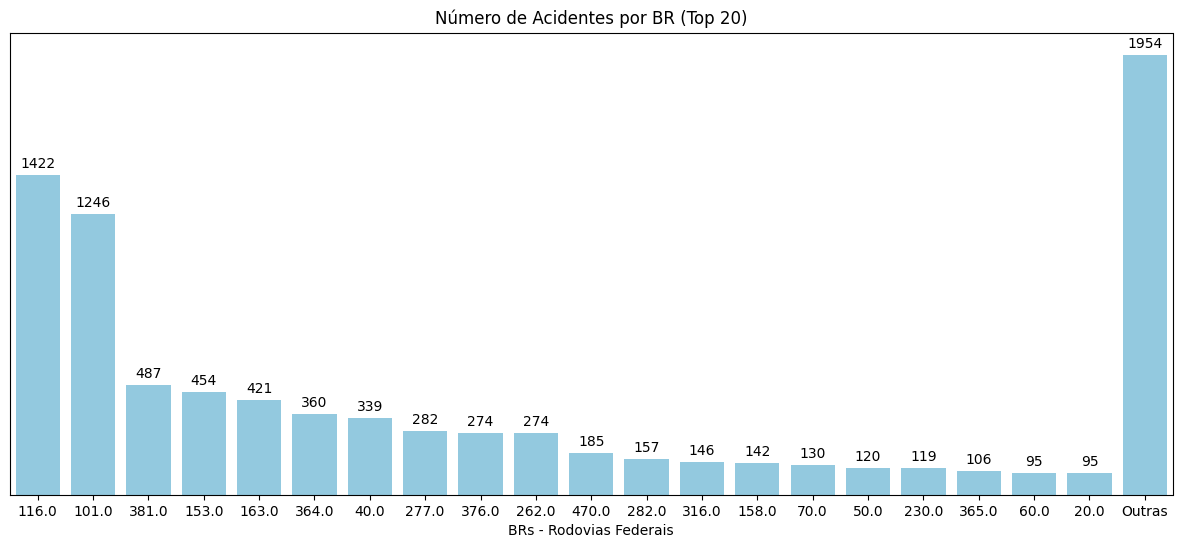

In [ ]:
plt.figure(figsize=(15,6))
grafico = sns.barplot(data=resultado_final, x= 'br', y = 'num_acidentes', color = 'skyblue')

# Remover o eixo y
plt.yticks([])

# Adicionar a quantidade de acidentes em cada barra
for p in grafico.patches:
    grafico.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 8),
                     textcoords = 'offset points')

plt.xlabel('BRs - Rodovias Federais')
plt.ylabel('') # Remove the label for the y axis
plt.title('Número de Acidentes por BR (Top 20)')
plt.show()


Com esse gráfico é possível tirar algumas informações:

* Possível notar que 101 Brs estiveram presentes nessas pesquisa
* A BR 101 e a BR 116 possuem uma quantidade de acidentes bem maiores do que o resto
* As 20 BRs com mais acidentes possuem juntas um total de 6854 acidentes
* As outras BRs somadas possuem 1954 acidentes

###4.3 Avaliando a gravidade dos acidentes (fatais, com feridos, sem vítimas)

**Criação das Colunas de Categorias de Acidentes:**

* Serão criadas quatro colunas no DataFrame, dos acidentes da PRF, para organizar melhor e criar uma linha de raciocínio que faça mais sentido. Serão consideradas as seguintes premissas:
  - acidente_com_vitima_fatal: Preenchida com acidentes que o número de mortos é maior que 1
  - acidente_com_vitima: Preenchida com acidentes em que o número de mortos = 0, e que houver pelo menos uma vítima com ferimentos.
  - acidente_sem_vitima: Preenchida com acidentes em que não se tem vítimas, nenhum ferido e pelo menos uma pessoa ilesa.
  - acidente_sem_informacao: Está coluna é preenchida quando ilesos, vítimas e mortos tem valor igual a 0, e pelo menos um registro como ignorado.

  * Após isso, serão feitos cálculos para a soma de cada uma das situações, para a criação de um gráfico específico.
  

In [ ]:
#Criando as colunas
df_acidentes['acidente_com_vitima_fatal'] = df_acidentes['mortos'] > 0
df_acidentes['acidente_com_vitima'] = ((df_acidentes['mortos'] == 0) & (df_acidentes['feridos'] > 0))
df_acidentes['acidente_sem_vitima'] = ((df_acidentes['mortos'] == 0) & (df_acidentes['feridos'] == 0) & (df_acidentes['ilesos'] > 0))
df_acidentes['acidente_sem_informacao'] = ((df_acidentes['mortos'] == 0) & (df_acidentes['feridos'] == 0) & (df_acidentes['ilesos'] == 0) & (df_acidentes['ignorados'] > 0))

In [ ]:
#Pegando a soma de cada coluna
acidente_com_vitima_fatal = df_acidentes['acidente_com_vitima_fatal'].sum()
acidente_com_vitima = df_acidentes['acidente_com_vitima'].sum()
acidente_sem_vitima = df_acidentes['acidente_sem_vitima'].sum()
acidente_sem_informacao = df_acidentes['acidente_sem_informacao'].sum()
total_de_acidentes = df_acidentes.shape[0]

In [ ]:
#Criando uma tabela com ambas as informações
# Criando um dicionário com os dados
data = {
    'Nome': ['Acidente com vítima fatal', 'Acidente com vítima', 'Acidente sem vítima', 'Acidente sem informação'],
    'Quantidade': [acidente_com_vitima_fatal, acidente_com_vitima, acidente_sem_vitima, acidente_sem_informacao]
}

# Convertendo o dicionário para um DataFrame
df_vitimas = pd.DataFrame(data)

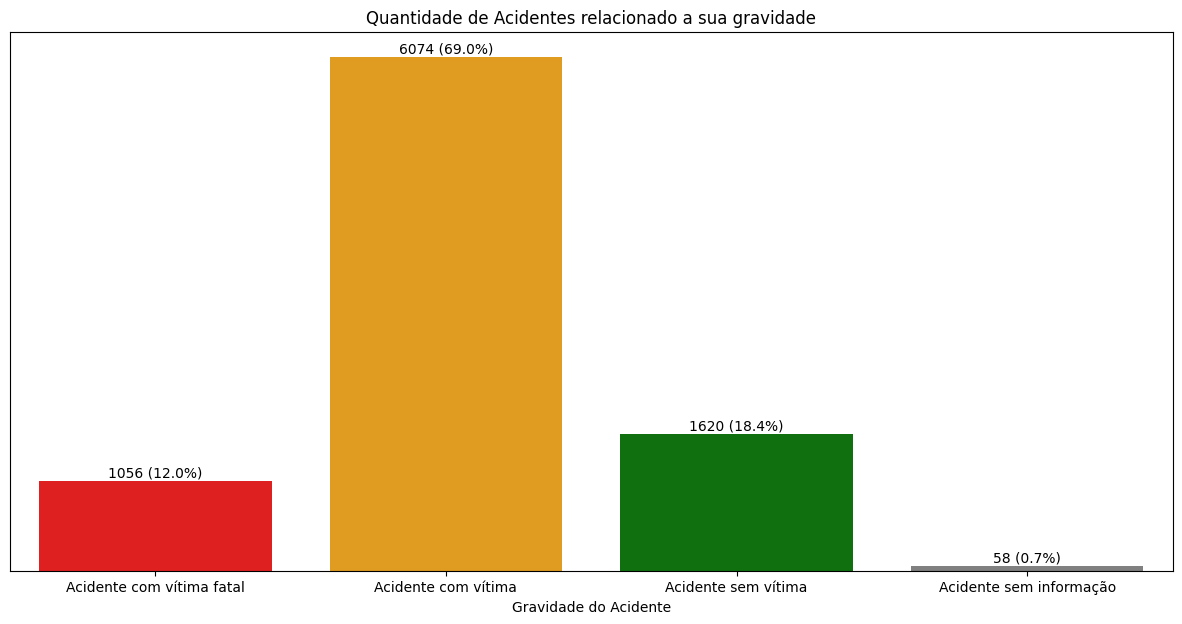

In [ ]:
#Criando um gráfico
plt.figure(figsize = (15,7))
colors = ['red', 'orange', 'green', 'gray']
grafico = sns.barplot(data=df_vitimas, x = 'Nome', y = 'Quantidade', palette =colors)

# Remover o eixo y
plt.yticks([])


total = df_vitimas['Quantidade'].sum()

# Adicionar a quantidade de acidentes e porcentagem em cada barra
for p in grafico.patches:
    height = int(p.get_height())
    percentage = (height/total)*100
    grafico.annotate(f'{height} ({percentage:.1f}%)',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 6),
                     textcoords='offset points')


plt.title('Quantidade de Acidentes relacionado a sua gravidade')
plt.xlabel('Gravidade do Acidente')
plt.ylabel('')
plt.show()

* Cerca de 12% dos acidentes geraram vítimas fatais, um número alto considerando o quão prejudicial esse tipo de acidente é
* A grande maioria dos acidentes ocorrem sem mortes, e com alguém ferido, representando 69% das vítimas totais
* 18.4% dos acidentes não possuem vítimas (mortos e feridos). Situação baixa para o ideal

##5. Identificação de Zonas de Alto risco

* Vamos nesse caso determinar áreas, como segmentos de rodovias, com alta frequência de acidentes graves. Além disso, faremos um paralelo com a localização atual dos radares, entendendo o efeito e causa.

###5.1 Determinar áreas com alta frequência de acidentes

####5.1.1 Mapa com Área de Risco

Primeiramente, criaremos um mapa de calor relacionado com a quantidade de acidentes em determinadas áreas.

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Definir o tamanho da amostra que você deseja para acidentes
tamanho_amostra_acidentes = df_acidentes.shape[0]

# Se o número de linhas no dataframe for menor que o tamanho da amostra, pegar todas as linhas
if len(df_acidentes) < tamanho_amostra_acidentes:
    df_acidentes_sample = df_acidentes
else:
    df_acidentes_sample = df_acidentes.sample(n=tamanho_amostra_acidentes)

# Criar o mapa
mapa = folium.Map(location=[df_acidentes['latitude'].mean(), df_acidentes['longitude'].mean()], zoom_start=5)

# Dados para o HeatMap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_acidentes_sample.iterrows()]

# Adicionando o HeatMap ao mapa com parâmetros ajustados
HeatMap(heat_data, radius=20, max_zoom=13, blur=15).add_to(mapa)

# Exibir o mapa
display(mapa)


* Podemos perceber que as regiões do Sudeste, Sul e Litoral Nordestino possuem uma quantidade grande de acidentes.
* A região Norte, interior do Nordeste, e grande parte do centro-oeste possuem uma quantidade pequena de aicdentes
* Possível ver pelo mapa que os estados com maior quantidade de acidentes são: Rio de Janeiro, Belo Horizonte, São Paulo e Paraná

####5.1.2 Relacionando BRs com KMs

* Nessa situação, vamos estar relacionando as BRs com Kilômetros específicos, para entender quais Brs em determinado Kilômetro estão gerando mais acidentes.
* Vamos criar uma coluna 'br-km' que será um agrupamento da br com o kilômetro
* Estaremos agrupando-as utilizando o agrupamento de gravidade já criado.


In [ ]:
#Primeiramente, transformaremos a nomenclatura que é 101.0 para BR-101 (como exemplo)
df_acidentes['br'] = df_acidentes['br'].apply(lambda x: 'BR-' + str(int(x)))



In [ ]:
df_acidentes.shape

(8808, 35)

In [ ]:
#Criando uma coluna combinando a BR e o Kilômetro
df_acidentes['br_km'] = df_acidentes['br'].astype(str) + ',' + 'KM' + '-' + df_acidentes['km'].astype(str)

In [ ]:
# Agrupamento e agregação
qtd_acidentes_por_kmbr = df_acidentes.groupby('br_km').agg({
    'acidente_com_vitima_fatal': 'sum',
    'acidente_com_vitima': 'sum',
    'acidente_sem_vitima': 'sum',
    'acidente_sem_informacao': 'sum',
}).reset_index()

# Adicionando uma coluna com o total de acidentes
qtd_acidentes_por_kmbr['total_acidentes'] = qtd_acidentes_por_kmbr[['acidente_com_vitima_fatal', 'acidente_com_vitima', 'acidente_sem_vitima', 'acidente_sem_informacao']].sum(axis=1)

# Ordenando por total de acidentes
qtd_acidentes_por_kmbr = qtd_acidentes_por_kmbr.sort_values(by='total_acidentes', ascending=False)

# Pegando as 20 primeiras linhas e excluindo 'BR-999-desconhecido'
qtd_acidentes_por_kmbr = qtd_acidentes_por_kmbr.head(20)
qtd_acidentes_por_kmbr = qtd_acidentes_por_kmbr.loc[qtd_acidentes_por_kmbr['br_km'] != 'BR-999,KM-desconhecido']

# Exibindo o dataframe atualizado
qtd_acidentes_por_kmbr



,br_km,acidente_com_vitima_fatal,acidente_com_vitima,acidente_sem_vitima,acidente_sem_informacao,total_acidentes
72,"BR-101,KM-117",1,9,2,0,12
386,"BR-101,KM-48",0,10,1,0,11
599,"BR-116,KM-126",0,9,1,0,10
154,"BR-101,KM-206",2,5,3,0,10
437,"BR-101,KM-70",1,8,1,0,10
700,"BR-116,KM-225",0,6,3,0,9
67,"BR-101,KM-112",2,6,1,0,9
241,"BR-101,KM-297",1,7,1,0,9
3854,"BR-364,KM-349",2,6,1,0,9
647,"BR-116,KM-176",1,4,3,0,8


* **Rodovias com Mais Acidentes:** Notório perceber a quantidade de acidentes envolvendo a BR-101 e a BR-116, podendo se destacar a BR-101-KM-117 com 12 acidentes.
* **Gravidade dos Acidentes**: A rodovia 'BR-101-48' tem o maior número de acidentes sem vítimas fatais, contabilizando 10 acidentes sem mortos. Em contrapartida, a rodovia 'BR-101-206' tem o segundo maior número de acidentes com vítimas fatais (2 acidentes)
* **Acidentes Sem Informação**: Nenhuma das rodovias listadas na tabela possuem acidentes sem informação, indicando que a coleta de dados é consistente e completa pra essas rodovias.

###5.2 Analisando as zonas perigosas com a localização dos radares.

* Para essa análise, faremos da mesma forma no DataFrame de radares, criando uma coluna 'br-km', relacionado a rodovia e o kilômetro.
* Ademais, agruparemos a quantidade de acidentes pela nova coluna criada, 'km-br'
* Além disso, concatenaremos a tabela de radares e a tabela de acidentes, para entender a quantidade de acidentes, e como se relacionam com a quantidade de radares por perto.
* Nessa nova tabela, colocaremos a rodovia-km, a quantidade de acidentes totais, a quantidade de acidentes com vítimas, a quantidade de acidentes sem vítimas e a a quantidade de radares.
* Traremos as top 15 rodovias com mais acidentes, sendo eles graves ou não.

In [ ]:
df_radares['br_km'] = df_radares['rodovia'] + ',' + 'KM' + '-' + df_radares['km'].astype(str)

In [ ]:
radares_por_rodovia_km = df_radares.groupby('br_km').size().reset_index(name='quantidade_radares')
radares_por_rodovia_km

,br_km,quantidade_radares
0,"BR-101,KM-114",2
1,"BR-101,KM-116",1
2,"BR-101,KM-126",4
3,"BR-101,KM-14",1
4,"BR-101,KM-140",1
...,...,...
497,"BR-70,KM-523",1
498,"BR-80,KM-125",1
499,"BR-80,KM-129",1
500,"BR-80,KM-130",1


In [ ]:
#Juntando as tabelas
acidentes_radar_km_br = pd.merge(qtd_acidentes_por_kmbr, radares_por_rodovia_km, how='left')

In [ ]:
acidentes_radar_km_br = acidentes_radar_km_br.fillna(0)

In [ ]:
acidentes_radar_km_br['quantidade_radares'].mean()

0.15789473684210525

In [ ]:
qtd_de_radares = df_radares.groupby('br_km').size().reset_index(name = 'qtd_de_radares')
qtd_de_radares = qtd_de_radares.fillna(0)
qtd_de_radares['qtd_de_radares'].mean()

1.2111553784860558

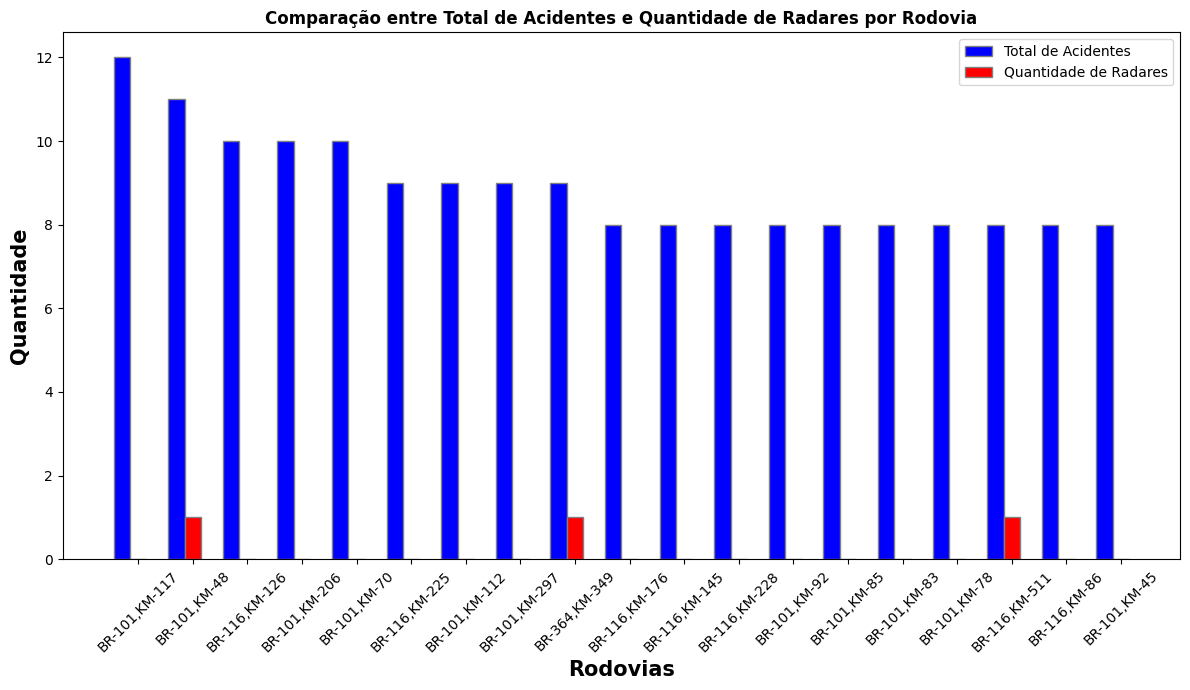

In [ ]:

# Configurando a posição das barras
barWidth = 0.3
r1 = np.arange(len(acidentes_radar_km_br['total_acidentes']))
r2 = [x + barWidth for x in r1]

# Criando o gráfico
plt.figure(figsize=(12,7))

# Barras para total_acidentes
plt.bar(r1, acidentes_radar_km_br['total_acidentes'], color='b', width=barWidth, edgecolor='grey', label='Total de Acidentes')

# Barras para quantidade_radares
plt.bar(r2, acidentes_radar_km_br['quantidade_radares'], color='r', width=barWidth, edgecolor='grey', label='Quantidade de Radares')

# Descrição dos eixos
plt.xlabel('Rodovias', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(acidentes_radar_km_br['total_acidentes']))], acidentes_radar_km_br['br_km'], rotation=45)
plt.ylabel('Quantidade', fontweight='bold', fontsize=15)

# Legenda e título
plt.legend()
plt.title('Comparação entre Total de Acidentes e Quantidade de Radares por Rodovia', fontweight='bold')

# Exibir o gráfico
plt.tight_layout()
plt.show()


* A presença de radares nas rodovias parece ser significativamente menor nas 18 rodovias BR-KM com mais acidentes, com uma média de apenas 0.15 radares. Isso é notavelmente inferior à média geral de 1.21 radares em rodovias BR-KM.
* A rodovia BR-101, KM-48, destaca-se por ser uma das poucas que possui radares, mas ainda assim tem um alto número de acidentes. Esse ponto pode indicar que outros fatores, além da presença de radares, também influenciam na ocorrência de acidentes, como condições da via, sinalização, fluxo de tráfego, entre outros
* Muitas rodovias apresentam um alto número de acidentes, mas não possuem radares instalados. Isso sugere que a instalação de mais radares nessas áreas pode ser uma estratégia eficaz para reduzir o número de acidentes


##6. Analisando a relação entre os acidentes e a o proximidade deles com os radares

###6.1 Criar um gráfico analisando a distância entre os acidentes e os radares mais próximos

* Para isso, usaremos a biblioteca geopandas e a shapely, que conseguirá concatenar em todo o banco de dados de maneira mais rápida.
* Estaremos calculando a distância, considerando a latitude e longitude, do radar mais perto em relação a estrada específica


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Converta dataframes para GeoDataFrames
gdf_acidentes = gpd.GeoDataFrame(df_acidentes, geometry=gpd.points_from_xy(df_acidentes.longitude, df_acidentes.latitude))
gdf_radares = gpd.GeoDataFrame(df_radares, geometry=gpd.points_from_xy(df_radares.longitude, df_radares.latitude))

# Garanta que ambos os GeoDataFrames estejam usando o mesmo sistema de coordenadas (CRS)
gdf_acidentes.crs = "EPSG:4326"
gdf_radares.crs = "EPSG:4326"

# Cálculo das distâncias
def distancia_minima(ponto, gdf_radares):
    return gdf_radares.distance(ponto).min()

gdf_acidentes['distancia_ao_radar_mais_proximo'] = gdf_acidentes['geometry'].apply(lambda x: distancia_minima(x, gdf_radares))


<ipython-input-63-396aad3d3bd6>:14: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return gdf_radares.distance(ponto).min()


In [ ]:
gdf_acidentes['distancia_ao_radar_mais_proximo'].describe()

count    8808.000000
mean        1.731907
std         2.537270
min         0.000068
25%         0.097374
50%         0.545834
75%         2.123906
max        15.632053
Name: distancia_ao_radar_mais_proximo, dtype: float64

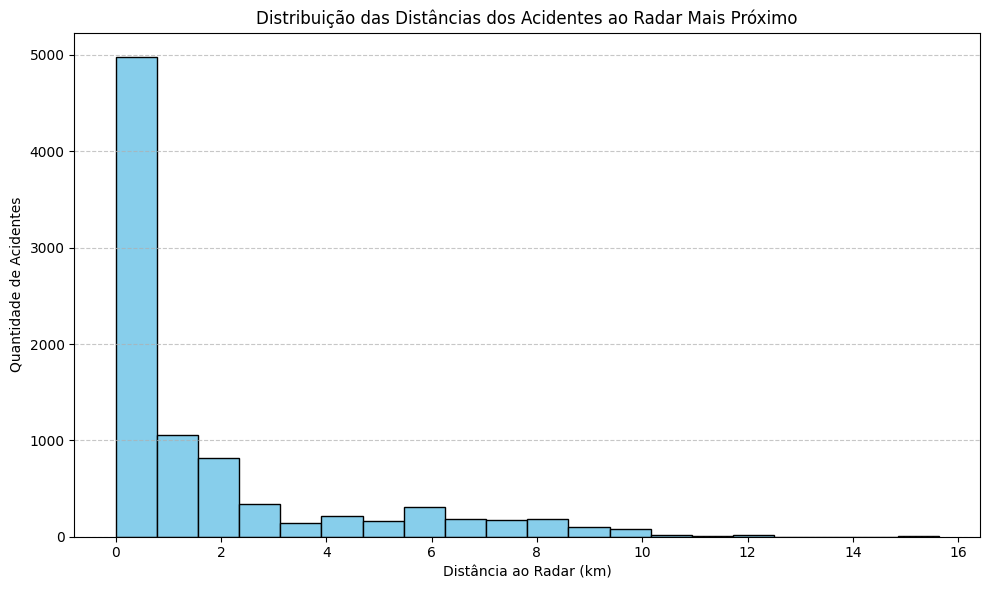

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(gdf_acidentes['distancia_ao_radar_mais_proximo'], bins=20,color='skyblue', edgecolor='black')
plt.title('Distribuição das Distâncias dos Acidentes ao Radar Mais Próximo')
plt.xlabel('Distância ao Radar (km)')
plt.ylabel('Quantidade de Acidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

- Concetração na Primeira Faixa: A maioria dos acidentes ocorre muito perto de um radar, especificamente entre 0 a 2km. O pico máximo está claramente na primeira barra do histograma,
- Acidentes em Distâncias Maiores São Menos Comuns: Há uma quantidade muito menor de acidentes que ocorrem a distância superiores a 6km do radar mais próximo. Essas ocorrências são esporádicas e representam uma minoria dos casos.
- A média de distância do radar para o acidente é de 1.73km
- A distância entre as vias varia muito, tendo a menor distância com 0.000038 km de um radar, e máaxima a 17 km.
- Essas análises são fundamentais para entender o processo e a localização dos radares em meio aos acidentes.